In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import pylatexenc
import math
from sklearn.preprocessing import MinMaxScaler
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv ('dataset.csv')
df.head()
df = df.drop(['x_std','z_std','y_mean','y_std','theta_std_dc','v_wind', 'theta_wind','dcd','rcp', 'T_wind'], axis=1)
df.head(1)

,theta_avg_dc,outlet_area,flowrate,dch,dcw,T_delta_mean
0,0,1879.2,18699822,15.3,12,1


In [3]:
#Prepare the data
X = np.array(df[df.columns[0:-1]])
X = MinMaxScaler().fit_transform(X)
y = np.array(df['T_delta_mean'])
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


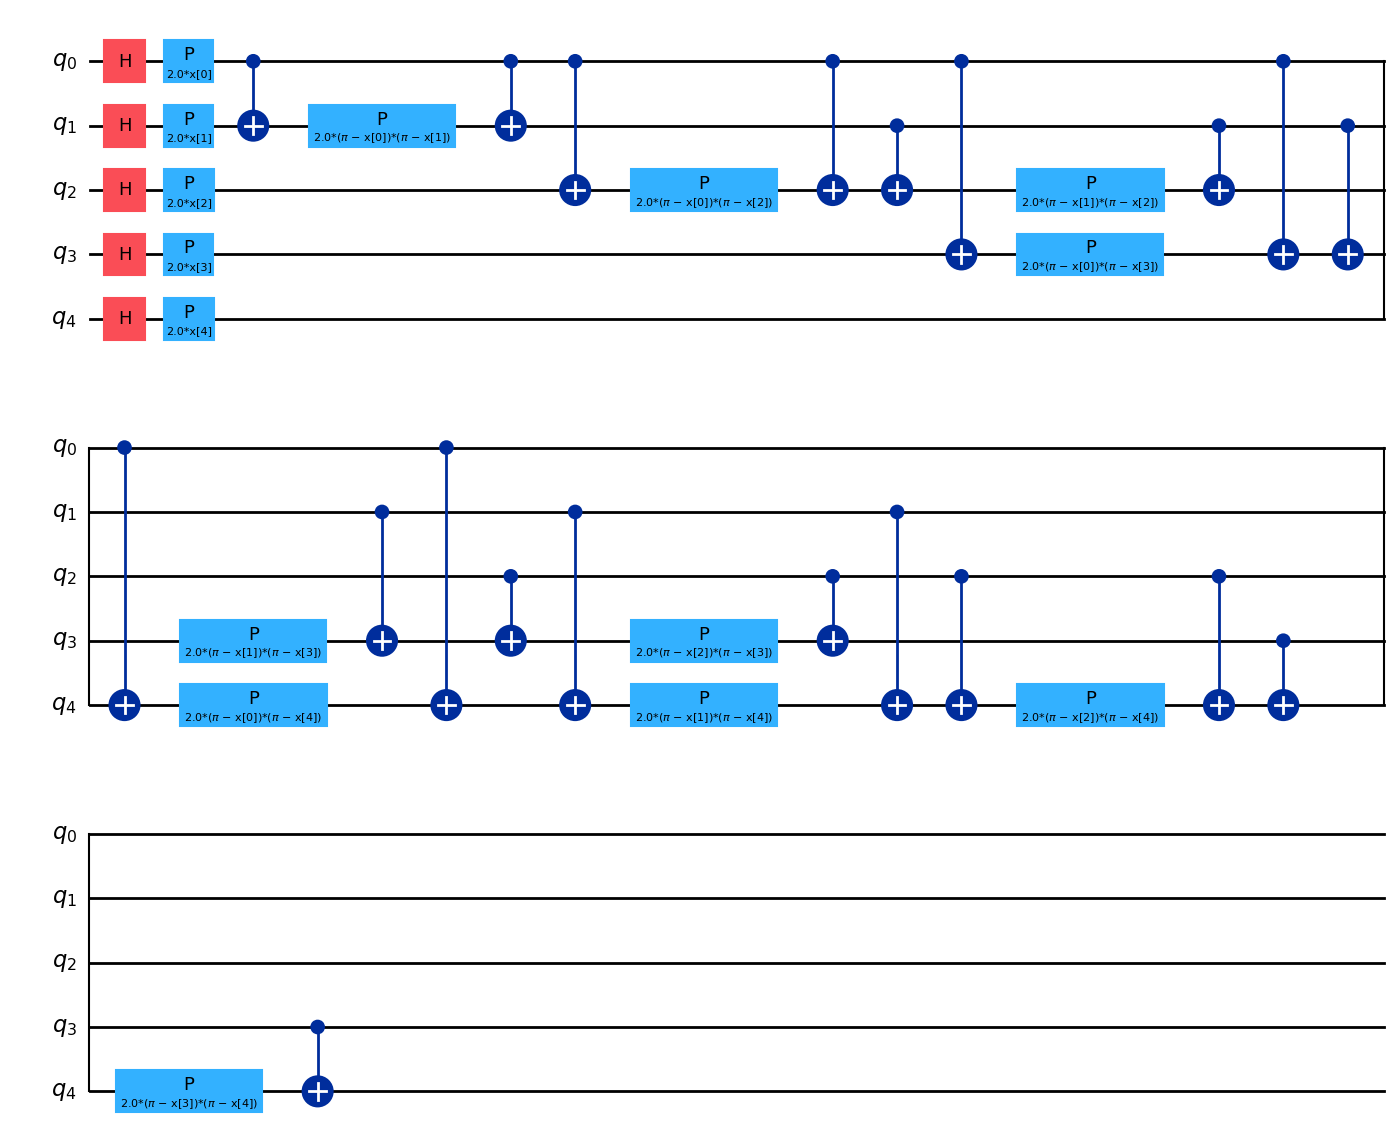

In [4]:
num_features = X.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20,style="iqp")

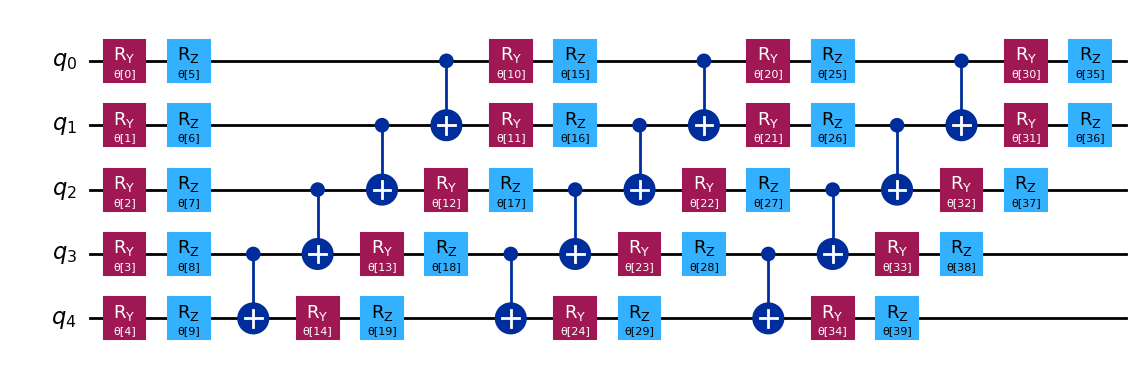

In [5]:
ansatz = EfficientSU2(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20,style="iqp")

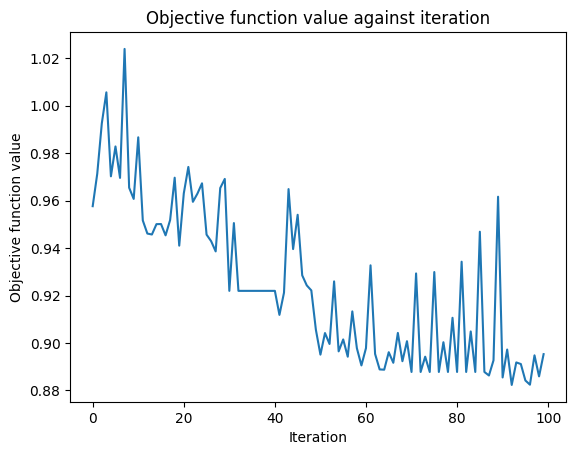

0.6346153846153846

In [6]:
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

vqc.fit(X, y)
vqc.score(X_test, y_test)